# **Tasca 1 Bioinformàtica**
## Mihai Spiridon Bodi
### 0. Preparar ambient de computació

In [1]:
system2(command = './preparar_ambiente.sh', wait = TRUE)

### 1. Introducció
En aquesta tasca ens disposem a analitzar, a la manera de l'exemple proporcionat, la distribució taxonòmica de les seqüències homòlogues del receptor muscarínic M1 (CHRM1) d'*Homo sapiens*. Es tracta d'un receptor de tipus muscarínic de l'acetilcolina. Segons Viscardi *et al* (2021) va apareixer en el llinatge de l'últim avantpassat comú entre cordats i cnidaris, és a dir, no es troben proteïnes homòlogues en altres *phyla*, com en plantes o fongs, tot i que apunten que els ctnòfors poden haver desenvolupat una xarxa nerviosa de forma indenpendent.

### 2. Mètodes
Anem a realitzar la búsqueda amb la base de dades Swissprot, ja instal·lada al Binder.

Al igual que a l'exemple s'utilitzarà **blastp** (Altschul *et al.*, 1990) amb diferents llindars de valor E, per a veure com va augmentant el nombre de seqüències trobades a mesura que es relaxa el valor exigit, incloent-ne d'organismes menys emparentats.

Desprès d'açò realitzarem un **PSI-BLAST** (Altschul *et al.*, 1997) utilitzant com a *query* un motiu que veurem que està molt conservat, utilitzam aquesta ferramenta ja que és més sensible per a trobar homòlegs amb un nivell d'identitat més baix que el **blastp**.

### 3. Resultats
#### 3.1. Blastp individual
En primer lloc realitzem un **blastp** amb un valor E llindar molt exigent, 1.0e-50, de manera que sols apareixeran seqüències molt paregudes a la original.


In [2]:
Blastp1 <- system2(command = 'blastp',
                      args = c('-db', 'swissprot',
                              '-query', 'CHRM1.fas',
                              '-evalue', '1.0e-50',
                              '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                      stdout = TRUE)

Taula1 <- read.table(textConnection(Blastp1),
                        sep = '\t',
                        col.names = c('saccver', 'pident', 'length', 'qstart',
                                     'qend', 'sstart', 'send', 'evalue', 'staxid',
                                     'ssciname', 'sblastname'))

dim(Taula1)

[1] 37 11

In [3]:
Taula1

saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
P11229.2,100.000,460,1,460,1,460,0.00e+00,9606,Homo sapiens,primates
P56489.1,99.565,460,1,460,1,460,0.00e+00,9544,Macaca mulatta,primates
Q5R949.1,99.565,460,1,460,1,460,0.00e+00,9601,Pongo abelii,primates
P04761.1,99.130,460,1,460,1,460,0.00e+00,9823,Sus scrofa,even-toed ungulates
P12657.2,98.913,460,1,460,1,460,0.00e+00,10090,Mus musculus,rodents
P08482.1,98.696,460,1,460,1,460,0.00e+00,10116,Rattus norvegicus,rodents
Q9N2A4.1,51.731,520,10,438,51,564,1.14e-170,9598,Pan troglodytes,primates
P20309.1,51.731,520,10,438,51,564,2.19e-170,9606,Homo sapiens,primates
Q9N2A3.1,51.737,518,10,436,51,562,1.08e-169,9595,Gorilla gorilla gorilla,primates


#### 3.2. Blastp en sèrie
Anem a realitzar una búsqueda com l'anterior, però utilitzant diferents valors E, especificats en Valors_E_maxims.

In [4]:
Valors_E_maxims <- c('1.0e-50', '1.0e-40', '1.0e-30', '1.0e-20', '1.0e-10',
                       '1.0e-08', '1.0e-06', '1.0e-04', '1.0e-02', '1')

Llista_de_Taules1 <- lapply(Valors_E_maxims,
                          function(x) {
                              BlastpOut <- system2(
                                  command = 'blastp',
                                  args = c('-db', 'swissprot',
                                           '-query', 'CHRM1.fas',
                                           '-evalue', x,
                                           '-outfmt',
                                           '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                  stdout = TRUE)
                              read.table(textConnection(BlastpOut),
                                         sep = '\t',
                                         col.names = c('saccver', 'pident', 'length', 'qstart',
                                            'qend', 'sstart', 'send', 'evalue', 'staxid',
                                            'ssciname', 'sblastname'))
                          })

Un exemple del resultat de la búsqueda, en concret per al valor E màxim, 1.0e-30.

In [5]:
tail(Llista_de_Taules1[[3]])

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
89,Q09388.3,36.323,223,34,241,14,236,2.66e-37,6239,Caenorhabditis elegans,nematodes
90,Q60476.1,26.699,412,34,433,56,445,1.07e-34,10141,Cavia porcellus,rodents
91,Q588Y6.1,33.761,234,3,235,26,247,1.10e-32,9685,Felis catus,carnivores
92,Q25322.1,30.085,236,23,258,49,271,1.07e-31,7004,Locusta migratoria,grasshoppers
93,Q25321.1,30.085,236,23,258,49,271,1.12e-31,7004,Locusta migratoria,grasshoppers
94,P35404.1,33.645,214,22,235,46,246,6.95e-31,9267,Didelphis virginiana,marsupials


Per a saber el nombre de resultats obtinguts en cada búsqueda:

In [6]:
Numero_de_resultats1 <- sapply(Llista_de_Taules1, function(x) dim(x)[1])
Numero_de_resultats1

[1]  37  53  94 249 485 577 647 682 730 774

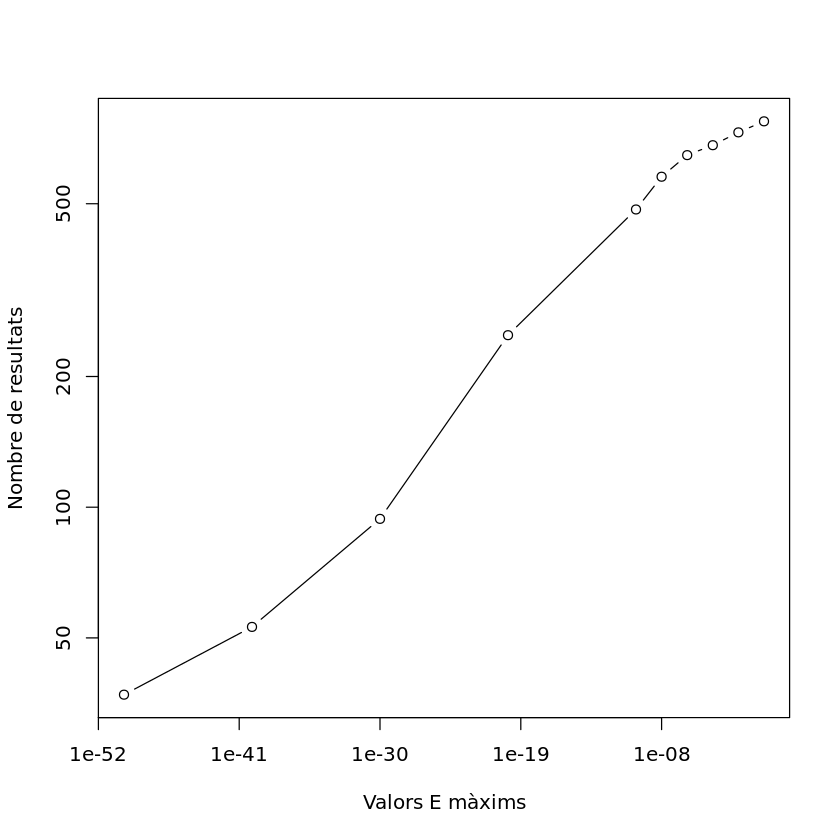

In [7]:
plot(Valors_E_maxims, Numero_de_resultats1, log = 'xy', type = 'b', xlab = 'Valors E màxims', ylab = 'Nombre de resultats')

Per a vore la relació entre la longitut de l'alineament i el valor E dels resultats en la taula 10, que és la que té un valor E menys restrictiu, d'1.

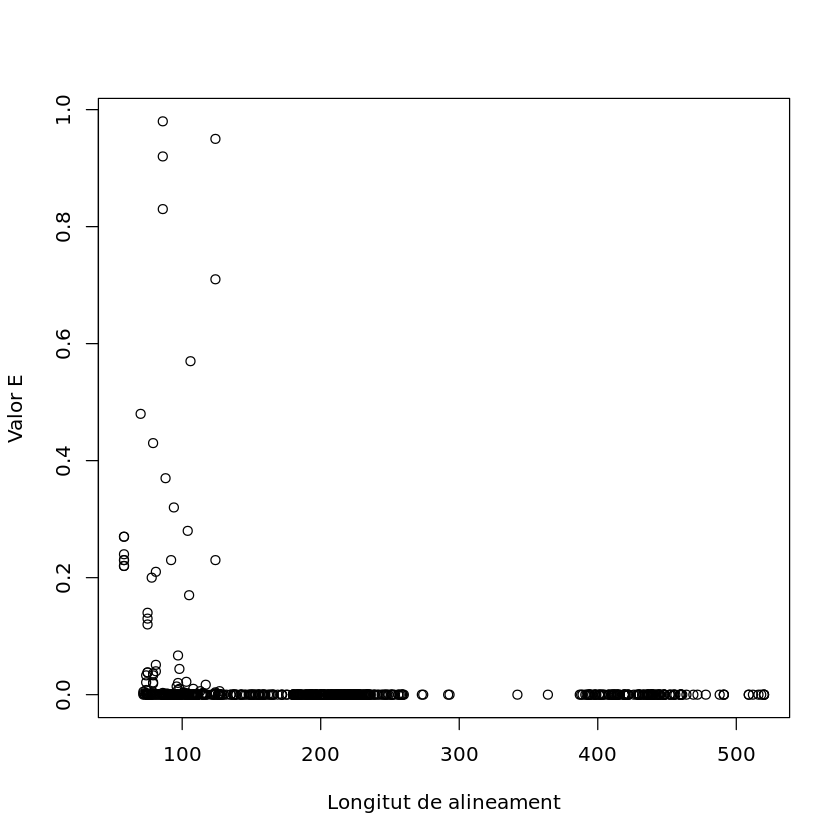

In [8]:
plot(Llista_de_Taules1[[10]]$length, Llista_de_Taules1[[10]]$evalue,
     xlab = 'Longitut de alineament', ylab = 'Valor E')

Per tal de determinar les regions d'homologia trobades i vore si estan conservades realitzem el següent gràfic, utilitzant les dades amb valor E menys restrictiu:

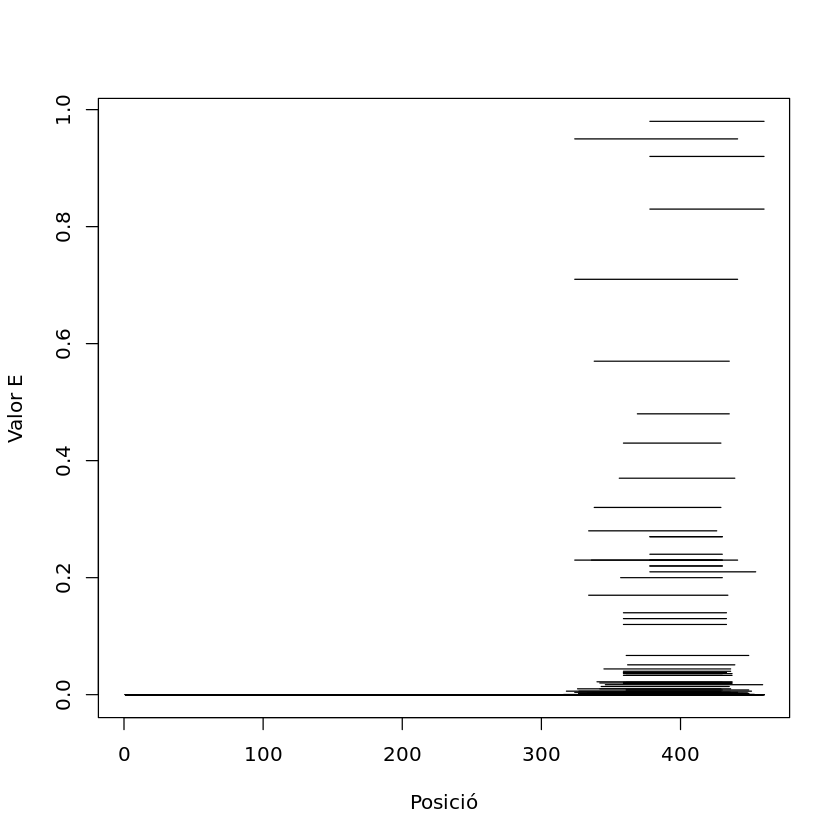

In [9]:
inicis1 <- Llista_de_Taules1[[10]]$qstart
finals1 <- Llista_de_Taules1[[10]]$qend
valorsE1 <- Llista_de_Taules1[[10]]$evalue

AlineamentMaxim1 <- max(Llista_de_Taules1[[10]]$qend)
plot(c(0, AlineamentMaxim1), range(valorsE1), type='n', xlab='Posició', ylab='Valor E')
segments(inicis1, valorsE1, finals1, valorsE1)

A continucació anem a observar la distribució taxonòmica de les seqüències trobades.

In [10]:
lapply(Llista_de_Taules1, function(x) table(x$sblastname))

[[1]]

              birds         crustaceans even-toed ungulates               flies 
                  3                   1                   5                   1 
      frogs & toads           nematodes            primates             rodents 
                  1                   1                  13                  12 

[[2]]

              birds         bony fishes         crustaceans even-toed ungulates 
                  3                   4                   1                   7 
              flies       frogs & toads               moths           nematodes 
                  1                   1                   1                   1 
           primates             rodents 
                 15                  19 

[[3]]

              birds         bony fishes          carnivores         crustaceans 
                  4                   6                   2                   1 
even-toed ungulates               flies       frogs & toads          gastropods 
    

Els grups taxonòmics que apareixen estarien d'acord amb l'afirmació de Viscardi *et al*, ja que no apareixen *phyla* de plantes ni d'altres grups no animals, excepte pel fet de que a partir d'un valor E de 1.0e-10, apareixen virus. Açò serà degut segurament a la transferència horitzontal de gens. Per tant, anem a tindre en compte sols alineaments més llargs, de manera que siga més  difícil que els virus l'incorporen.

In [11]:
lapply(Llista_de_Taules1, function(x) {
       filtro <- x$length >= 300
       table(x[filtro, 'sblastname'])
    }
)

[[1]]

              birds         crustaceans even-toed ungulates               flies 
                  3                   1                   5                   0 
      frogs & toads           nematodes            primates             rodents 
                  1                   0                  13                  10 

[[2]]

              birds         bony fishes         crustaceans even-toed ungulates 
                  3                   4                   1                   7 
              flies       frogs & toads               moths           nematodes 
                  0                   1                   1                   0 
           primates             rodents 
                 15                  15 

[[3]]

              birds         bony fishes          carnivores         crustaceans 
                  4                   6                   1                   1 
even-toed ungulates               flies       frogs & toads          gastropods 
    

#### 3.3. PSI-BLAST
A continuació anem a realitzar una búsqueda amb **PSI-BLAST** amb la seqüència de nucleòtids del motiu conservat que veiem a les gràfiques. Aquest motiu comprén els nucleòtids 359 a 441 de la proteïna completa, i es corresponen amb una regió amb estructura secundària en alfa-hèlix majoritàriament.

Es tria aquesta ferramenta ja que és més sensible que el **blastp**, permetent trobar seqüències homòlogues en organismes més allunyats.
Per altra banda anem a fitar la búsqueda a 9 iteracions per a que no tarde massa temps en convergir, ja que la seqüència és prou curta i comencem amb un valor E molt elevat. A més, podria donar-nos falsos positius si accepta massa seqüències.

Aquesta seqüpencia i les dades de l'estructura s'han obtés mitjançant una búsqueda manual a *Uniprot*.
Nom de l'arxiu: *CHRM1_domain.fas*.

In [12]:
psiBlast1 <- system2(command = 'psiblast',
                      args = c('-db', 'swissprot',
                              '-query', 'CHRM1_domain.fas',
                              '-evalue', '10',
                              '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"',
                              '-inclusion_ethresh', '0.001',
                              '-num_iterations', '9'
                              ),
                       stdout = TRUE)


Taula2 <- read.table(textConnection(psiBlast1),
                        sep = '\t',
                        col.names = c('saccver', 'pident', 'length', 'qstart',
                                      'qend', 'sstart', 'send', 'evalue', 'staxid',
                                      'ssciname', 'sblastname')
                          )
# Dimensiones de la tabla:
 dim(Taula2)

[1] 4500   11

In [13]:
head(Taula2)

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
1,P11229.2,100.000,83,1,83,359,441,3.46e-54,9606,Homo sapiens,primates
2,Q5R949.1,100.000,83,1,83,359,441,3.46e-54,9601,Pongo abelii,primates
3,P56489.1,100.000,83,1,83,359,441,3.73e-54,9544,Macaca mulatta,primates
4,P08482.1,98.795,83,1,83,359,441,5.71e-54,10116,Rattus norvegicus,rodents
5,P12657.2,98.795,83,1,83,359,441,5.96e-54,10090,Mus musculus,rodents
6,P04761.1,98.795,83,1,83,359,441,8.47e-54,9823,Sus scrofa,even-toed ungulates


In [14]:
tail(Taula2)

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
4495,O13076.1,30.952,84,1,81,228,311,1.43e-18,9031,Gallus gallus,birds
4496,Q864H2.1,27.500,80,4,79,238,317,1.58e-18,9490,Saguinus oedipus,primates
4497,Q864H5.1,27.500,80,4,79,238,317,1.60e-18,9491,Saguinus imperator,primates
4498,Q865E8.1,28.750,80,4,79,238,317,1.63e-18,9690,Panthera onca,carnivores
4499,Q865E5.1,30.000,80,4,79,238,317,1.63e-18,1608482,Puma yagouaroundi,carnivores
4500,O97967.1,22.989,87,2,82,266,352,1.70e-18,9940,Ovis aries,even-toed ungulates


In [15]:
resum <- as.data.frame(summary(Taula2$sblastname))
names(resum) = "Nombre d'espècies"

In [16]:
resum

,Nombre d'espècies
,<int>
birds,124
bony fishes,500
carnivores,293
cephalopods,1
crustaceans,18
even-toed ungulates,358
flies,135
frogs & toads,153
gastropods,45


### 4. Discussió

Com hem vist, la majoria de seqüències que apareixen són d'organismes corresponents a animals, excepte dos de virus. La presència d'aquests últims deu ser deguda a la transferència horitzontal de gens al infectar a algun d'aquest animals. Buscant en la llista completa de seqüències (no es mostra per tal d'estalviar espai) trobem que aquest virus són el *Swinepox virus* i el *Sheeppox virus KS-1*, i realitzant una búqueda ràpida al NCBI veiem que els seus hostes són vertebrats, confirmant la nostra hipòtesi. Al tindre en compte sols alineaments de 300 o més nucleòtids comprovem que aquestes seqüències ja no hi apareixen, demostrant que sols eren alineaments parcials.

En l'anàlisi amb **PSI-BLAST** del motiu conservat, trobem que el nombre de *hits* augmenta fins a 4500, encara que també pertanyen a grups taxonòmics d'animals, exepte un de virus (en aquest cas l'*Equine herpesvirus*). El fet de que no apareguen altres organismes que no compten amb sistema nerviós com plantes o fongs, pot indicar que aquest motiu té una funcionalitat específica per a la neurotransmissió.

Finalment, també crida l'atenció que no apareguen seqüències de cnidaris i grups semblants, que segons Viscardi *et al* sí haurien de comptar amb aquestes proteïnes. Açò pot ser degut a que aquests organismes no estan tan ben descrits i no apareixen les seues seqüències anotades i revisades al Swissprot. Per alra banda els investigadors utilitzen la base de dades de *KEGG*. Es podria intentar realitzar una búsqueda a una base de dades més ampla, com TrEMBL, i comprovar les seues afirmacions.

### 5. Bibliografia
- Stephen F. Altschul, Warren Gish, Webb Miller, Eugene W. Myers and David J. Lipman. Basic local alignment search tool, *Journal of Molecular Biology*, Volume 215, Issue 3, 1990, Pages 403-410, [doi:10.1016/S0022-2836(05)80360-2](https://doi.org/10.1016/S0022-2836(05)80360-2).
- Altschul SF, Madden TL, Schäffer AA, Zhang J, Zhang Z, Miller W, Lipman DJ. Gapped BLAST and PSI-BLAST: a new generation of protein database search programs. Nucleic Acids Res. 1997 Sep 1;25(17):3389-402. [doi: 10.1093/nar/25.17.3389](https://pubmed.ncbi.nlm.nih.gov/9254694/).
- Viscardi LH, Imparato DO, Bortolini MC, Dalmolin RJS. Ionotropic Receptors as a Driving Force behind Human Synapse Establishment. Mol Biol Evol. 2021 Mar 9;38(3):735-744. [doi: 10.1093/molbev/msaa252](https://pubmed.ncbi.nlm.nih.gov/32986821/).
